In [213]:
import numpy as np

In [214]:
def tableau_to_latex(tableau):
    rows, cols = tableau.shape
    latex_str = r"\begin{equation}" + "\n"
    latex_str += r"\begin{array}{c}" + "\n"
    latex_str += r"\\ z \\ \bar{x}_5 \\ \bar{x_6} \\ x_4 \\ \end{array}" + "\n"
    latex_str += r"\begin{bmatrix}" + "\n"
    latex_str += r"\begin{array}{c|cccccc|c}" + "\n"
    latex_str += r"z & x_1 & x_2 & x_3 & x_4 & \bar{x}_5 & \bar{x}_6 & RHS \\ \hline" + "\n"
    
    # Handling the first row (z row) separately to account for the extra 'z' column value
    row_str = "  " + " & ".join(map(str, tableau[0])) + " \\\\ \\hline"
    latex_str += row_str + "\n"
    
    # Loop through the rest of the tableau rows (excluding the first one) to format them into LaTeX
    for i in range(1, rows):
        row_str = "  " + " & ".join(map(str, tableau[i])) + " \\\\"
        latex_str += row_str + "\n"
    
    latex_str += r"\end{array}" + "\n"
    latex_str += r"\end{bmatrix}" + "\n"
    latex_str += r"\end{equation}"
    
    return latex_str


In [215]:

def minimum_ratio_test(tableau, pivot_col):
    """
    Perform the minimum ratio test to determine the pivot row.
    
    Parameters:
    tableau (numpy.ndarray): The simplex tableau.
    pivot_col (int): The index of the pivot column.
    
    Returns:
    int: The index of the pivot row (the row that will leave the basis).
    """
    rows, cols = tableau.shape
    rhs = tableau[:, -1]  # RHS is the last column of the tableau
    ratios = []

    for i in range(1, rows):  # Skip the z-row (row 0)
        # Only consider positive entries in the pivot column
        if tableau[i, pivot_col] > 0:
            ratio = rhs[i] / tableau[i, pivot_col]
            ratios.append(ratio)
        else:
            ratios.append(np.inf)  # Ignore negative or zero entries
    
    # Find the row with the minimum ratio
    pivot_row = np.argmin(ratios) + 1  # Adjust for 1-based indexing (since we skipped row 0)

    return pivot_row, ratios




In [216]:

def pivot_operation(tableau, pivot_row, pivot_col):
    """
    Perform the pivot operation on the given tableau and print row operations.
    Additionally, generate LaTeX output for the row operations.
    
    Parameters:
    tableau (numpy.ndarray): The current simplex tableau.
    pivot_row (int): The row index of the pivot element.
    pivot_col (int): The column index of the pivot element.
    
    Returns:
    tuple: The updated tableau after the pivot operation and the LaTeX output.
    """
    # Ensure the tableau is using floating-point arithmetic
    tableau = tableau.astype(float)
    
    latex_operations = []
    
    # Normalize the pivot row
    pivot_element = tableau[pivot_row, pivot_col]
    print(f"\nNormalizing pivot row {pivot_row} (pivot element: {pivot_element}):")
    tableau[pivot_row] = tableau[pivot_row] / pivot_element
    print(f"Row {pivot_row} after normalization: {tableau[pivot_row]}\n")
    
    # Add LaTeX operation for normalizing the pivot row (with proper math mode)
    latex_operations.append(f"\\item Normalize row {pivot_row} by dividing by the pivot element (${pivot_element}$).")
    
    # Perform row operations to zero out the pivot column in all other rows
    rows, cols = tableau.shape
    for i in range(rows):
        if i != pivot_row:  # Don't modify the pivot row itself
            multiplier = tableau[i, pivot_col]
            print(f"Row operation for row {i}:")
            print(f"Old row {i}: {tableau[i]}")
            print(f"Subtracting {multiplier} * row {pivot_row}")
            tableau[i] = tableau[i] - multiplier * tableau[pivot_row]
            print(f"New row {i}: {tableau[i]}\n")
            
            # Add LaTeX operation for updating this row (with proper math mode)
            latex_operations.append(f"\\item Row {i}: Subtract ${multiplier} \\times \\text{{row {pivot_row}}}$.")
    
    # Generate the LaTeX string for row operations
    latex_output = "\\begin{itemize}\n" + "\n".join(latex_operations) + "\n\\end{itemize}"
    
    return tableau, latex_output


In [234]:


# Create the matrix as shown in the image
tableau = np.array([
    [-1, 0, 0, 0, 0, 1, 1, 0],  # Row for z
    [ 0, -1, 2, 0, 0, 1, 0, 4],  # Row for x5
    [ 0, 1, 1, -1, 0, 0, 1, 5],  # Row for x6
    [ 0, 2, 1, 0, 1, 0, 0, 22],  # Row for x4
])

# Extract coefficients for further calculations if needed
z_row = tableau[0]
x5_row = tableau[1]
x6_row = tableau[2]
x4_row = tableau[3]


# Print out the initial tableau
print("Initial Tableau:")
print(tableau)


Initial Tableau:
[[-1  0  0  0  0  1  1  0]
 [ 0 -1  2  0  0  1  0  4]
 [ 0  1  1 -1  0  0  1  5]
 [ 0  2  1  0  1  0  0 22]]


In [235]:
tableau[0] = tableau[0] - tableau[1]
tableau[0] = tableau[0] - tableau[2]

print(tableau)


[[-1  0 -3  1  0  0  0 -9]
 [ 0 -1  2  0  0  1  0  4]
 [ 0  1  1 -1  0  0  1  5]
 [ 0  2  1  0  1  0  0 22]]


In [236]:
# Generate the LaTeX code for the tableau
latex_code = tableau_to_latex(tableau)

# Output the LaTeX 
print("Tableau:")
print(tableau)
print("Generated LaTeX Code for the tableau:")
print(latex_code)

Tableau:
[[-1  0 -3  1  0  0  0 -9]
 [ 0 -1  2  0  0  1  0  4]
 [ 0  1  1 -1  0  0  1  5]
 [ 0  2  1  0  1  0  0 22]]
Generated LaTeX Code for the tableau:
\begin{equation}
\begin{array}{c}
\\ z \\ \bar{x}_5 \\ \bar{x_6} \\ x_4 \\ \end{array}
\begin{bmatrix}
\begin{array}{c|cccccc|c}
z & x_1 & x_2 & x_3 & x_4 & \bar{x}_5 & \bar{x}_6 & RHS \\ \hline
  -1 & 0 & -3 & 1 & 0 & 0 & 0 & -9 \\ \hline
  0 & -1 & 2 & 0 & 0 & 1 & 0 & 4 \\
  0 & 1 & 1 & -1 & 0 & 0 & 1 & 5 \\
  0 & 2 & 1 & 0 & 1 & 0 & 0 & 22 \\
\end{array}
\end{bmatrix}
\end{equation}


In [237]:
print(tableau)
minimum_ratio_test(tableau=tableau, pivot_col=2)

[[-1  0 -3  1  0  0  0 -9]
 [ 0 -1  2  0  0  1  0  4]
 [ 0  1  1 -1  0  0  1  5]
 [ 0  2  1  0  1  0  0 22]]


(1, [2.0, 5.0, 22.0])

In [238]:
tableau,latex = pivot_operation(tableau, 1,2)
tableau


Normalizing pivot row 1 (pivot element: 2.0):
Row 1 after normalization: [ 0.  -0.5  1.   0.   0.   0.5  0.   2. ]

Row operation for row 0:
Old row 0: [-1.  0. -3.  1.  0.  0.  0. -9.]
Subtracting -3.0 * row 1
New row 0: [-1.  -1.5  0.   1.   0.   1.5  0.  -3. ]

Row operation for row 2:
Old row 2: [ 0.  1.  1. -1.  0.  0.  1.  5.]
Subtracting 1.0 * row 1
New row 2: [ 0.   1.5  0.  -1.   0.  -0.5  1.   3. ]

Row operation for row 3:
Old row 3: [ 0.  2.  1.  0.  1.  0.  0. 22.]
Subtracting 1.0 * row 1
New row 3: [ 0.   2.5  0.   0.   1.  -0.5  0.  20. ]



array([[-1. , -1.5,  0. ,  1. ,  0. ,  1.5,  0. , -3. ],
       [ 0. , -0.5,  1. ,  0. ,  0. ,  0.5,  0. ,  2. ],
       [ 0. ,  1.5,  0. , -1. ,  0. , -0.5,  1. ,  3. ],
       [ 0. ,  2.5,  0. ,  0. ,  1. , -0.5,  0. , 20. ]])

In [222]:
print(latex)

\begin{itemize}
\item Normalize row 1 by dividing by the pivot element ($2.0$).
\item Row 0: Subtract $-3.0 \times \text{row 1}$.
\item Row 2: Subtract $1.0 \times \text{row 1}$.
\item Row 3: Subtract $1.0 \times \text{row 1}$.
\end{itemize}


In [239]:
print(tableau_to_latex(tableau))


\begin{equation}
\begin{array}{c}
\\ z \\ \bar{x}_5 \\ \bar{x_6} \\ x_4 \\ \end{array}
\begin{bmatrix}
\begin{array}{c|cccccc|c}
z & x_1 & x_2 & x_3 & x_4 & \bar{x}_5 & \bar{x}_6 & RHS \\ \hline
  -1.0 & -1.5 & 0.0 & 1.0 & 0.0 & 1.5 & 0.0 & -3.0 \\ \hline
  0.0 & -0.5 & 1.0 & 0.0 & 0.0 & 0.5 & 0.0 & 2.0 \\
  0.0 & 1.5 & 0.0 & -1.0 & 0.0 & -0.5 & 1.0 & 3.0 \\
  0.0 & 2.5 & 0.0 & 0.0 & 1.0 & -0.5 & 0.0 & 20.0 \\
\end{array}
\end{bmatrix}
\end{equation}


In [240]:
print(tableau)
minimum_ratio_test(tableau=tableau, pivot_col=1)

[[-1.  -1.5  0.   1.   0.   1.5  0.  -3. ]
 [ 0.  -0.5  1.   0.   0.   0.5  0.   2. ]
 [ 0.   1.5  0.  -1.   0.  -0.5  1.   3. ]
 [ 0.   2.5  0.   0.   1.  -0.5  0.  20. ]]


(2, [inf, 2.0, 8.0])

In [241]:
tableau, latex = pivot_operation(tableau, 2,1)


Normalizing pivot row 2 (pivot element: 1.5):
Row 2 after normalization: [ 0.          1.          0.         -0.66666667  0.         -0.33333333
  0.66666667  2.        ]

Row operation for row 0:
Old row 0: [-1.  -1.5  0.   1.   0.   1.5  0.  -3. ]
Subtracting -1.5 * row 2
New row 0: [-1.  0.  0.  0.  0.  1.  1.  0.]

Row operation for row 1:
Old row 1: [ 0.  -0.5  1.   0.   0.   0.5  0.   2. ]
Subtracting -0.5 * row 2
New row 1: [ 0.          0.          1.         -0.33333333  0.          0.33333333
  0.33333333  3.        ]

Row operation for row 3:
Old row 3: [ 0.   2.5  0.   0.   1.  -0.5  0.  20. ]
Subtracting 2.5 * row 2
New row 3: [ 0.          0.          0.          1.66666667  1.          0.33333333
 -1.66666667 15.        ]



In [242]:
print(latex)

\begin{itemize}
\item Normalize row 2 by dividing by the pivot element ($1.5$).
\item Row 0: Subtract $-1.5 \times \text{row 2}$.
\item Row 1: Subtract $-0.5 \times \text{row 2}$.
\item Row 3: Subtract $2.5 \times \text{row 2}$.
\end{itemize}


In [244]:
tableau = tableau.round(3)
tableau

array([[-1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  1.   ,  0.   ],
       [ 0.   ,  0.   ,  1.   , -0.333,  0.   ,  0.333,  0.333,  3.   ],
       [ 0.   ,  1.   ,  0.   , -0.667,  0.   , -0.333,  0.667,  2.   ],
       [ 0.   ,  0.   ,  0.   ,  1.667,  1.   ,  0.333, -1.667, 15.   ]])

In [245]:
print(tableau_to_latex(tableau=tableau))

\begin{equation}
\begin{array}{c}
\\ z \\ \bar{x}_5 \\ \bar{x_6} \\ x_4 \\ \end{array}
\begin{bmatrix}
\begin{array}{c|cccccc|c}
z & x_1 & x_2 & x_3 & x_4 & \bar{x}_5 & \bar{x}_6 & RHS \\ \hline
  -1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.0 & 1.0 & 0.0 \\ \hline
  0.0 & 0.0 & 1.0 & -0.333 & 0.0 & 0.333 & 0.333 & 3.0 \\
  0.0 & 1.0 & 0.0 & -0.667 & 0.0 & -0.333 & 0.667 & 2.0 \\
  0.0 & 0.0 & 0.0 & 1.667 & 1.0 & 0.333 & -1.667 & 15.0 \\
\end{array}
\end{bmatrix}
\end{equation}


### PHASE 2

In [247]:
# Original tableau (before row operations)
tableau = np.array([
    [1.0, -3.0, -2.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, -0.333, 0.0, 3.0],
    [0.0, 1.0, 0.0, -0.667, 0.0, 2.0],
    [0.0, 0.0, 0.0, 1.667, 1.0, 15.0]
])


tableau[0] = tableau[0] + 2*tableau[1] + 3*tableau[2]

In [248]:
print(tableau_to_latex(tableau))

\begin{equation}
\begin{array}{c}
\\ z \\ \bar{x}_5 \\ \bar{x_6} \\ x_4 \\ \end{array}
\begin{bmatrix}
\begin{array}{c|cccccc|c}
z & x_1 & x_2 & x_3 & x_4 & \bar{x}_5 & \bar{x}_6 & RHS \\ \hline
  1.0 & 0.0 & 0.0 & -2.6670000000000003 & 0.0 & 12.0 \\ \hline
  0.0 & 0.0 & 1.0 & -0.333 & 0.0 & 3.0 \\
  0.0 & 1.0 & 0.0 & -0.667 & 0.0 & 2.0 \\
  0.0 & 0.0 & 0.0 & 1.667 & 1.0 & 15.0 \\
\end{array}
\end{bmatrix}
\end{equation}


In [249]:
tableau

array([[ 1.   ,  0.   ,  0.   , -2.667,  0.   , 12.   ],
       [ 0.   ,  0.   ,  1.   , -0.333,  0.   ,  3.   ],
       [ 0.   ,  1.   ,  0.   , -0.667,  0.   ,  2.   ],
       [ 0.   ,  0.   ,  0.   ,  1.667,  1.   , 15.   ]])

In [250]:
print(minimum_ratio_test(tableau, 3))

print(15/(8/3))

(3, [inf, inf, 8.998200359928013])
5.625


In [251]:
tableau,latex = pivot_operation(tableau, 3, 3)
tableau


Normalizing pivot row 3 (pivot element: 1.667):
Row 3 after normalization: [0.         0.         0.         1.         0.59988002 8.99820036]

Row operation for row 0:
Old row 0: [ 1.     0.     0.    -2.667  0.    12.   ]
Subtracting -2.6670000000000003 * row 3
New row 0: [ 1.          0.          0.          0.          1.59988002 35.99820036]

Row operation for row 1:
Old row 1: [ 0.     0.     1.    -0.333  0.     3.   ]
Subtracting -0.333 * row 3
New row 1: [0.         0.         1.         0.         0.19976005 5.99640072]

Row operation for row 2:
Old row 2: [ 0.     1.     0.    -0.667  0.     2.   ]
Subtracting -0.667 * row 3
New row 2: [0.         1.         0.         0.         0.40011998 8.00179964]



array([[ 1.        ,  0.        ,  0.        ,  0.        ,  1.59988002,
        35.99820036],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.19976005,
         5.99640072],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.40011998,
         8.00179964],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.59988002,
         8.99820036]])

In [253]:
print(latex)

\begin{itemize}
\item Normalize row 3 by dividing by the pivot element ($1.667$).
\item Row 0: Subtract $-2.6670000000000003 \times \text{row 3}$.
\item Row 1: Subtract $-0.333 \times \text{row 3}$.
\item Row 2: Subtract $-0.667 \times \text{row 3}$.
\end{itemize}


In [254]:
tableau = tableau.round(3)

In [255]:
tableau

array([[ 1.   ,  0.   ,  0.   ,  0.   ,  1.6  , 35.998],
       [ 0.   ,  0.   ,  1.   ,  0.   ,  0.2  ,  5.996],
       [ 0.   ,  1.   ,  0.   ,  0.   ,  0.4  ,  8.002],
       [ 0.   ,  0.   ,  0.   ,  1.   ,  0.6  ,  8.998]])

In [256]:
print(tableau_to_latex(tableau))

\begin{equation}
\begin{array}{c}
\\ z \\ \bar{x}_5 \\ \bar{x_6} \\ x_4 \\ \end{array}
\begin{bmatrix}
\begin{array}{c|cccccc|c}
z & x_1 & x_2 & x_3 & x_4 & \bar{x}_5 & \bar{x}_6 & RHS \\ \hline
  1.0 & 0.0 & 0.0 & 0.0 & 1.6 & 35.998 \\ \hline
  0.0 & 0.0 & 1.0 & 0.0 & 0.2 & 5.996 \\
  0.0 & 1.0 & 0.0 & 0.0 & 0.4 & 8.002 \\
  0.0 & 0.0 & 0.0 & 1.0 & 0.6 & 8.998 \\
\end{array}
\end{bmatrix}
\end{equation}


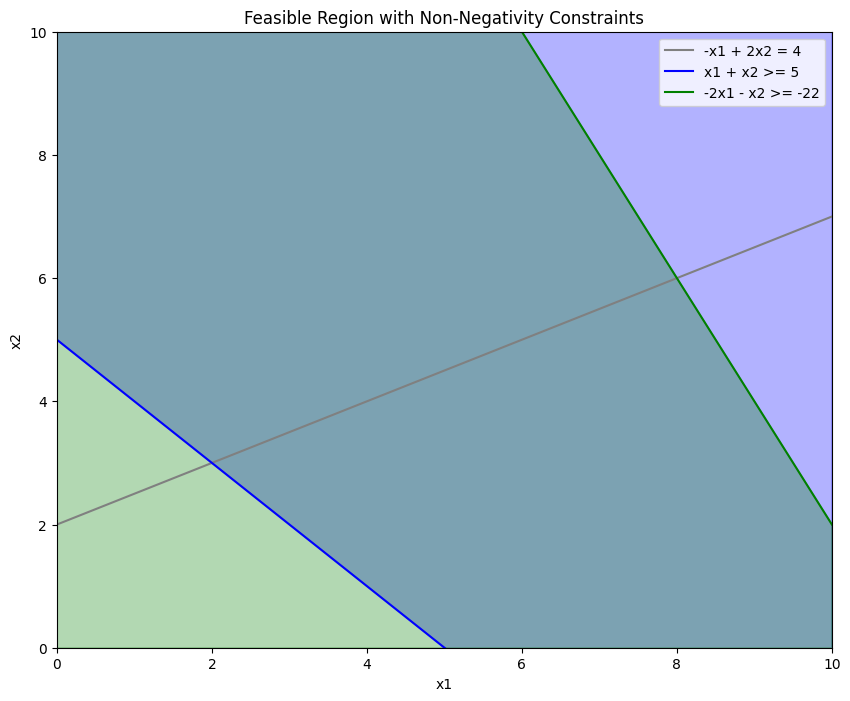

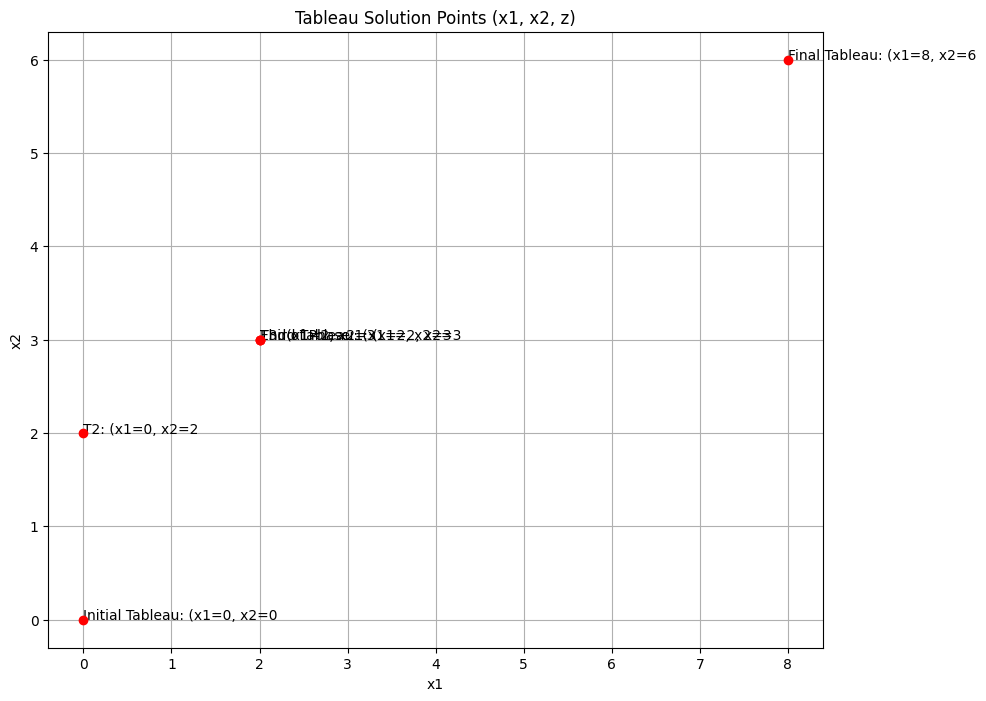

In [26]:
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 400)

# Creating the plot with the additional non-negativity constraints
plt.figure(figsize=(10, 8))

### x = x1, y = x2
# First constraint: -x1 + 2x2 = 4  --> x2 = (4 + x1)/2
y1 = (4 + x) / 2

# Second constraint: x1 + x2 >= 5  --> x2 = 5 - x1 (as a line boundary)
y2 = 5 - x

# Third constraint: -2x1 - x2 >= -22  --> x2 = -22 + 2x1 (as a line boundary)
y3 = 22 - 2 * x

# Plotting the line for -x1 + 2x2 = 4
plt.plot(x, y1, label='-x1 + 2x2 = 4', color='gray')

# Plotting the line for x1 + x2 >= 5
plt.plot(x, y2, label='x1 + x2 >= 5', color='blue')

# Plotting the line for -2x1 - x2 >= -22
plt.plot(x, y3, label='-2x1 - x2 >= -22', color='green')

# Shading the feasible region with the x1 >= 0 and x2 >= 0 constraints
plt.fill_between(x, y2, 10, where=(y2 <= 10) & (x >= 0), color='blue', alpha=0.3)

plt.fill_between(x, y3, 0, where=(y3 >= 0) & (x >= 0), color='green', alpha=0.3)


# Labels and plot adjustments
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Feasible Region with Non-Negativity Constraints')
plt.legend()


# tableaux_solutions = {
#     'Initial Tableau': [0, 0, 0, 22, 4, 5, 0],
#     'First Valid Tableau': [0, 2, 0, 22, 0, 3, -9],
#     'Second Tableau': [2, 3, 0, 15, 0, 0, 0],
#     'Third Tableau': [2, 3, 0, 15, 0, 0, 12],
#     'End of Phase 1': [2, 3, 0, 15, 0, 0, 12],
#     'First Tableau in Phase 2': [8, 6, 0, 0, 0, 0, 36],
#     'Final Tableau': [8, 6, 9, 0, 0, 0, 36]
# }

tableaux_solutions = {
    'Initial Tableau': [0, 0],
    'T2': [0, 2],
    'T3': [2, 3],
    'Third Tableau': [2, 3],
    'End of Phase 1': [2, 3],
    'Final Tableau': [8, 6]
}

# Extract x1, x2, and z values for plotting (ignore the artificial variables for the plot)
x1_values = [val[0] for val in tableaux_solutions.values()]
x2_values = [val[1] for val in tableaux_solutions.values()]
labels = list(tableaux_solutions.keys())

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the points for each tableau
plt.scatter(x1_values, x2_values, color='red', zorder=5)
for i, label in enumerate(labels):
    plt.text(x1_values[i], x2_values[i], f'{label}: (x1={x1_values[i]}, x2={x2_values[i]}', fontsize=10)

# Labels and plot adjustments
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Tableau Solution Points (x1, x2, z)')
plt.grid(True)

# Show the plot
plt.show()


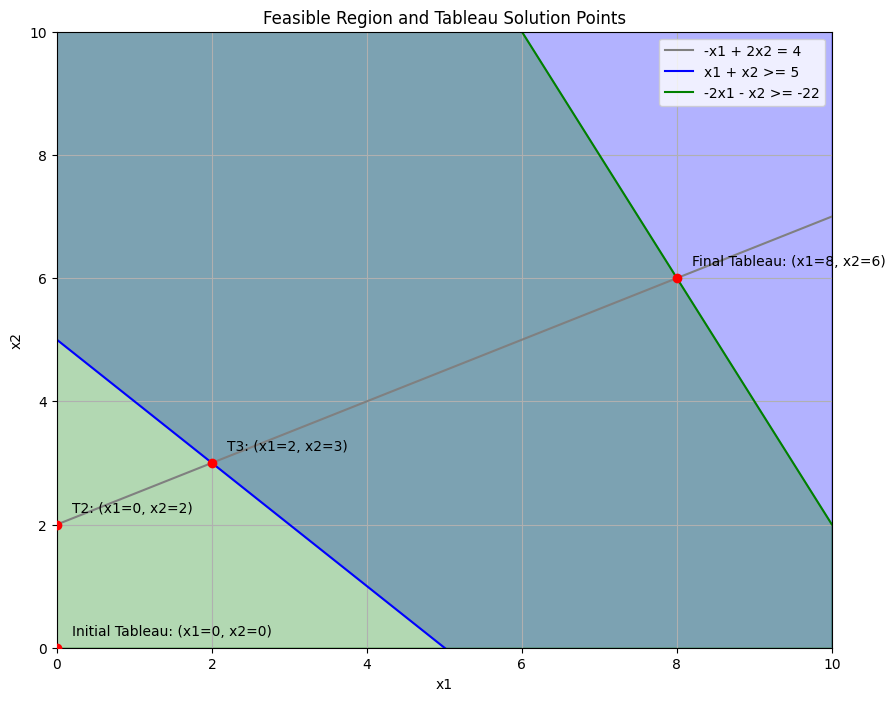

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values (x1 values)
x = np.linspace(0, 10, 400)

# First constraint: -x1 + 2x2 = 4  --> x2 = (4 + x1)/2
y1 = (4 + x) / 2

# Second constraint: x1 + x2 >= 5  --> x2 = 5 - x1 (as a line boundary)
y2 = 5 - x

# Third constraint: -2x1 - x2 >= -22  --> x2 = 22 - 2 * x (as a line boundary)
y3 = 22 - 2 * x

# Creating the plot with the additional non-negativity constraints
plt.figure(figsize=(10, 8))

# Plot constraint lines
plt.plot(x, y1, label='-x1 + 2x2 = 4', color='gray')
plt.plot(x, y2, label='x1 + x2 >= 5', color='blue')
plt.plot(x, y3, label='-2x1 - x2 >= -22', color='green')

# Shading the feasible region with x1 >= 0 and x2 >= 0 constraints
plt.fill_between(x, y2, 10, where=(y2 <= 10) & (x >= 0), color='blue', alpha=0.3)
plt.fill_between(x, y3, 0, where=(y3 >= 0) & (x >= 0), color='green', alpha=0.3)

# Tableau solution points
tableaux_solutions = {
    'Initial Tableau': [0, 0],
    'T2': [0, 2],
    'T3': [2, 3],
    'Final Tableau': [8, 6]
}

# Extract x1 and x2 values for plotting
x1_values = [val[0] for val in tableaux_solutions.values()]
x2_values = [val[1] for val in tableaux_solutions.values()]
labels = list(tableaux_solutions.keys())

# Plot the points for each tableau
plt.scatter(x1_values, x2_values, color='red', zorder=5)

# Add labels for each point
for i, label in enumerate(labels):
    plt.text(x1_values[i] + 0.2, x2_values[i] + 0.2, f'{label}: (x1={x1_values[i]}, x2={x2_values[i]})', fontsize=10)

# Labels and plot adjustments
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Feasible Region and Tableau Solution Points')
plt.legend()
plt.grid(True)

# Show the plot with both the feasible region and tableau points
plt.show()
